In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt

data = xr.open_dataset("data/delhi_cpcb_2022.nc")
# data = xr.open_dataset("delhi_cpcb_2022.nc")
data

<xarray.Dataset>
Dimensions:    (station: 40, time: 8783)
Coordinates:
  * station    (station) object 'Alipur, Delhi - DPCC' ... 'Wazirpur, Delhi -...
  * time       (time) datetime64[ns] 2022-01-01T00:30:00 ... 2023-01-01T22:23:30
    latitude   (station) float64 ...
    longitude  (station) float64 ...
Data variables: (12/21)
    From Date  (station, time) datetime64[ns] ...
    To Date    (station, time) datetime64[ns] ...
    PM2.5      (station, time) float64 ...
    PM10       (station, time) float64 ...
    NO         (station, time) float64 ...
    NO2        (station, time) float64 ...
    ...         ...
    WD         (station, time) float64 ...
    SR         (station, time) float64 ...
    BP         (station, time) float64 ...
    AT         (station, time) float64 ...
    RF         (station, time) float64 ...
    TOT-RF     (station, time) float64 ...

In [2]:
df = data.to_dataframe()
# df = df["2022-01-01": "2022-12-31"]
df = data.to_dataframe().reset_index()
df = df[df["time"]=="2022-01-01 00:30:00"]
df = df.dropna(subset=["PM2.5"])
df = df.rename(columns={"RH": "relative_humidity", "WS": "wind_speed", "WD": "wind_direction", "SR": "solar_radiation", "BP": "pressure", "AT": "temperature", "RF": "rain_fall", "TOT-RF": "total_rainfall"})

In [3]:
lat_list = [28.815329,28.647622,28.695381,28.4706914,28.7762,28.7256504,28.5512005,28.656756,28.7500499,28.498571,28.5710274,28.655935,28.5627763,28.6811736,28.628624,28.73282,28.58028,28.588333,28.5918245,28.611281,28.636429,28.684678,28.60909,28.570173,28.822836,28.56789,28.6573814,28.530785,28.623763,28.674045,28.639645,28.639645,28.563262,28.732528,28.6514781,28.5504249,28.710508,28.531346,28.672342,28.699793]

In [4]:
df

,station,time,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,relative_humidity,wind_speed,wind_direction,solar_radiation,pressure,temperature,rain_fall,total_rainfall,latitude,longitude
0,"Alipur, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
8783,"Anand Vihar, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,...,84.15,0.30,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809
17566,"Ashok Vihar, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,428.75,533.50,137.55,46.52,136.90,45.27,...,90.15,0.25,112.43,6.03,993.50,10.17,0.0,0.0,28.695381,77.181665
26349,"Aya Nagar, Delhi - IMD",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,147.12,254.39,21.02,33.68,54.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
35132,"Bawana, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,300.00,452.00,69.28,16.77,86.20,63.47,...,83.62,0.40,178.80,5.60,998.92,7.77,0.0,0.0,28.776200,77.051074
43915,"Burari Crossing, Delhi - IMD",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,177.43,310.28,NaN,NaN,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.725650,77.201157
52698,"CRRI Mathura Road, Delhi - IMD",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,279.40,515.89,88.21,20.72,108.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.551201,77.273574
61481,"Chandni Chowk, Delhi - IITM",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,67.35,622.57,117.02,241.84,220.23,80.52,...,70.79,2.13,316.77,NaN,NaN,17.16,0.0,0.0,28.656756,77.227234
70264,"DTU, Delhi - CPCB",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,286.05,317.00,NaN,NaN,NaN,NaN,...,87.85,1.27,221.37,7.12,NaN,13.71,0.0,0.0,28.750050,77.111261
79047,"Dr. Karni Singh Shooting Range, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,242.00,310.75,29.80,102.42,78.77,49.42,...,81.32,0.45,247.55,5.23,994.15,7.90,0.0,0.0,28.498571,77.264840


In [5]:
df.head()

,station,time,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,relative_humidity,wind_speed,wind_direction,solar_radiation,pressure,temperature,rain_fall,total_rainfall,latitude,longitude
0,"Alipur, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
8783,"Anand Vihar, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,...,84.15,0.30,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809
17566,"Ashok Vihar, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,428.75,533.50,137.55,46.52,136.90,45.27,...,90.15,0.25,112.43,6.03,993.50,10.17,0.0,0.0,28.695381,77.181665
26349,"Aya Nagar, Delhi - IMD",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,147.12,254.39,21.02,33.68,54.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.470691,77.109936
35132,"Bawana, Delhi - DPCC",2022-01-01 00:30:00,2022-01-01,2022-01-01 01:00:00,300.00,452.00,69.28,16.77,86.20,63.47,...,83.62,0.40,178.80,5.60,998.92,7.77,0.0,0.0,28.776200,77.051074


In [6]:
import networkx as nx
import math

# Define the distance threshold for G1 (in kilometers)
distance_threshold_1 = 10

# Create an empty nx graph
G1 = nx.Graph()

# Iterate through each node in the dataset
for i in range(len(df)):
    lat1, lon1 = df.iloc[i]['latitude'], df.iloc[i]['longitude']
    pm = df.iloc[i]['PM2.5']
    
    # Add the current node to the nx graph
    G1.add_node(i, latitude=lat1, longitude=lon1, pm=pm)

    # Iterate through the remaining nodes
    for j in range(i + 1, len(df)):
        lat2, lon2 = df.iloc[j]['latitude'], df.iloc[j]['longitude']
        
        # Calculate the distance between the coordinates using the Haversine formula
        radius = 6371  # Earth's radius in kilometers
        dlat = math.radians(lat2 - lat1)
        dlon = math.radians(lon2 - lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance = radius * c
        
        # Check if the distance is below the threshold
        if distance <= distance_threshold_1:
            # Add an edge between the current pair of nodes in the nx graph
            G1.add_edge(i, j)

# Define the distance threshold for G2 (in kilometers)
distance_threshold_2 = 30

# Create an empty nx graph
G2 = nx.Graph()

# Iterate through each node in the dataset
for i in range(len(df)):
    lat1, lon1 = df.iloc[i]['latitude'], df.iloc[i]['longitude']
    pm = df.iloc[i]['PM2.5']
    
    # Add the current node to the nx graph
    G2.add_node(i, latitude=lat1, longitude=lon1, pm=pm)

    # Iterate through the remaining nodes
    for j in range(i + 1, len(df)):
        lat2, lon2 = df.iloc[j]['latitude'], df.iloc[j]['longitude']
        
        # Calculate the distance between the coordinates using the Haversine formula
        radius = 6371  # Earth's radius in kilometers
        dlat = math.radians(lat2 - lat1)
        dlon = math.radians(lon2 - lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance = radius * c
        
        # Check if the distance is below the threshold
        if distance <= distance_threshold_2:
            # Add an edge between the current pair of nodes in the nx graph
            G2.add_edge(i, j)

# Now you have the nx graph where nodes represent the data points with latitude and longitude as features, and edges represent nodes within the distance threshold


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset
from torch_geometric.nn import GCNConv, GATConv

#G1
node_features = [(G1.nodes[node]['latitude'], G1.nodes[node]['longitude']) for node in G1.nodes]
edge_index = torch.tensor(list(G1.edges)).t().contiguous()
y = torch.tensor([G1.nodes[node]['pm'] for node in G1.nodes], dtype=torch.float).view(-1, 1)
sorted_nodes = sorted(G1.nodes(), key=lambda node: G1.nodes[node]['latitude'])

# Divide train and test masks based on the sorted latitudes
train_mask = torch.zeros(y.size(0), dtype=torch.bool)
test_mask = torch.zeros(y.size(0), dtype=torch.bool)

for i, node in enumerate(G1.nodes):
    lat = G1.nodes[node]['latitude']
    if lat in lat_list[:25]:
        train_mask[i] = True
    else:
        test_mask[i] = True


data1 = Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index, y=y,train_mask=train_mask, test_mask=test_mask)

#G2
node_features = [(G2.nodes[node]['latitude'], G2.nodes[node]['longitude']) for node in G2.nodes]
edge_index = torch.tensor(list(G2.edges)).t().contiguous()
y = torch.tensor([G2.nodes[node]['pm'] for node in G2.nodes], dtype=torch.float).view(-1, 1)
sorted_nodes = sorted(G2.nodes(), key=lambda node: G2.nodes[node]['latitude'])

# Divide train and test masks based on the sorted latitudes
train_mask = torch.zeros(y.size(0), dtype=torch.bool)
test_mask = torch.zeros(y.size(0), dtype=torch.bool)

for i, node in enumerate(G2.nodes):
    lat = G2.nodes[node]['latitude']
    if lat in lat_list[:25]:
        train_mask[i] = True
    else:
        test_mask[i] = True


data2 = Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index, y=y,train_mask=train_mask, test_mask=test_mask)

In [8]:
# from torch_geometric.utils import to_networkx
# import networkx as nx
# import matplotlib.pyplot as plt


# def visualize_graph(G, color):
#     plt.figure(figsize=(7,7))
#     plt.xticks([])
#     plt.yticks([])
#     nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,)
#     plt.show()

# def visualize_embedding(h, color, epoch=None, loss=None):
#     plt.figure(figsize=(7,7))
#     plt.xticks([])
#     plt.yticks([])
#     h = h.detach().cpu().numpy()
#     plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
#     if epoch is not None and loss is not None:
#         plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
#     plt.show()
    
# G1 = to_networkx(data1, to_undirected=True)
# visualize_graph(G1, color=data1.y)


# G2 = to_networkx(data2, to_undirected=True)
# visualize_graph(G2, color=data2.y)

In [9]:
from torch_geometric.nn import GCNConv, GATConv

class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.conv1 = GCNConv(input_dim, 16)
        self.conv2 = GCNConv(16, 10)
        self.linear1 = nn.Linear(10, 10)
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x


In [10]:
import random
seed = 42
random.seed(seed)
torch.manual_seed(seed)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = RegressionModel(input_dim=2).to(device)
model2 = RegressionModel(input_dim=2).to(device)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [11]:
train_rmse_list1 = []
test_rmse_list1 = []

train_rmse_list2 = []
test_rmse_list2 = []

In [12]:
from tqdm import tqdm

#Training Loop for G1
for epoch in tqdm(range(2500)):
    optimizer.zero_grad()
    out = model1(data1.x.to(device), data1.edge_index.to(device))
    loss = criterion(out[data1.train_mask].squeeze(), data1.y[data1.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%100==0):
        model1.eval()
        with torch.no_grad():
            out = model1(data1.x.to(device), data1.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data1.train_mask].squeeze() - data1.y[data1.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data1.test_mask].squeeze() - data1.y[data1.test_mask].squeeze())**2))
            train_rmse_list1.append(train_rmse.item())
            test_rmse_list1.append(test_rmse.item())
        model1.train()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
criterion = nn.MSELoss()
# Training Loop for G2
for epoch in tqdm(range(2500)):
    optimizer.zero_grad()
    out = model2(data2.x.to(device), data2.edge_index.to(device))
    loss = criterion(out[data2.train_mask].squeeze(), data2.y[data2.train_mask].squeeze())
    loss.backward()
    optimizer.step()
    if(epoch%100==0):
        model2.eval()
        with torch.no_grad():
            out = model2(data2.x.to(device), data2.edge_index.to(device))  # Predicted PM values
            train_rmse = torch.sqrt(torch.mean((out[data2.train_mask].squeeze() - data2.y[data2.train_mask].squeeze())**2))
            test_rmse = torch.sqrt(torch.mean((out[data2.test_mask].squeeze() - data2.y[data2.test_mask].squeeze())**2))
            train_rmse_list2.append(train_rmse.item())
            test_rmse_list2.append(test_rmse.item())
        model2.train()

100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:05<00:00, 441.78it/s]


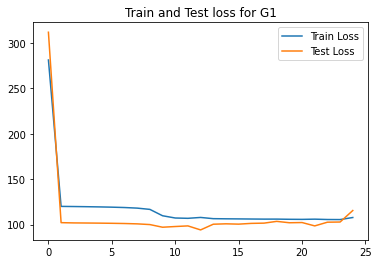

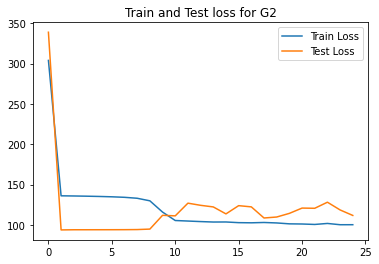

In [13]:
import matplotlib.pyplot as plt

# Assuming you have train_loss_list and test_loss_list as lists containing the respective losses

# Plotting train loss
plt.plot(range(len(train_rmse_list1)), train_rmse_list1, label='Train Loss')

# Plotting test loss
plt.plot(range(len(test_rmse_list1)), test_rmse_list1, label='Test Loss')
plt.title("Train and Test loss for G1")
plt.legend()
plt.show()


# Plotting train loss
plt.plot(range(len(train_rmse_list2)), train_rmse_list2, label='Train Loss')

# Plotting test loss
plt.plot(range(len(test_rmse_list2)), test_rmse_list2, label='Test Loss')
plt.title("Train and Test loss for G2")
plt.legend()
plt.show()

In [14]:
model1.eval()
with torch.no_grad():
    out = model1(data1.x.to(device), data1.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data1.train_mask].squeeze() - data1.y[data1.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data1.test_mask].squeeze() - data1.y[data1.test_mask].squeeze())**2))
    print("G1")
    print(f"GNN train rmse:{train_rmse}")
    print(f"GNN test rmse: {test_rmse}")

model2.eval()
with torch.no_grad():
    out = model2(data2.x.to(device), data2.edge_index.to(device))  # Predicted PM values
    train_rmse = torch.sqrt(torch.mean((out[data2.train_mask].squeeze() - data2.y[data2.train_mask].squeeze())**2))
    test_rmse = torch.sqrt(torch.mean((out[data2.test_mask].squeeze() - data2.y[data2.test_mask].squeeze())**2))
    print("\nG2")
    print(f"GNN train rmse:{train_rmse}")
    print(f"GNN test rmse: {test_rmse}")

G1
GNN train rmse:105.39474487304688
GNN test rmse: 103.20608520507812

G2
GNN train rmse:99.44822692871094
GNN test rmse: 116.51101684570312


# Predictions using model1 (distance threshold 10km)

In [15]:
latitudes = np.array(df['latitude'])
longitudes = np.array(df['longitude'])
g_lat = np.linspace(latitudes.min()-0.1, latitudes.max()+0.1, 30)
g_long = np.linspace(longitudes.min()-0.1, longitudes.max()+0.1, 30)
lat_grid, lon_grid = np.meshgrid(g_lat, g_long)

train = df[['latitude', 'longitude', 'PM2.5']]
test = pd.DataFrame({'longitude':lon_grid.flatten(),
                 'latitude':lat_grid.flatten()})

In [16]:
import networkx as nx
import math

# Define the distance threshold for G1 (in kilometers)
distance_threshold_1 = 30

# Create an empty nx graph
Gh = nx.Graph()

# Iterate through each node in the dataset
for i in range(len(test)):
    lat1, lon1 = test.iloc[i]['latitude'], test.iloc[i]['longitude']
#     pm = test.iloc[i]['PM2.5']
    
    # Add the current node to the nx graph
    Gh.add_node(i, latitude=lat1, longitude=lon1)

    # Iterate through the remaining nodes
    for j in range(i + 1, len(test)):
        lat2, lon2 = test.iloc[j]['latitude'], test.iloc[j]['longitude']
        
        # Calculate the distance between the coordinates using the Haversine formula
        radius = 6371  # Earth's radius in kilometers
        dlat = math.radians(lat2 - lat1)
        dlon = math.radians(lon2 - lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance = radius * c
        
        # Check if the distance is below the threshold
        if distance <= distance_threshold_1:
            # Add an edge between the current pair of nodes in the nx graph
            Gh.add_edge(i, j)

# Now you have the nx graph where nodes represent the data points with latitude and longitude as features, and edges represent nodes within the distance threshold

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset

#Gh
node_features = [(Gh.nodes[node]['latitude'], Gh.nodes[node]['longitude']) for node in Gh.nodes]
edge_index = torch.tensor(list(Gh.edges)).t().contiguous()
# y = torch.tensor([G1.nodes[node]['pm'] for node in G1.nodes], dtype=torch.float).view(-1, 1)

data_h = Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index)

In [18]:
out = model1(data_h.x.to(device), data_h.edge_index.to(device))
test['PM2.5'] = out.detach().numpy()

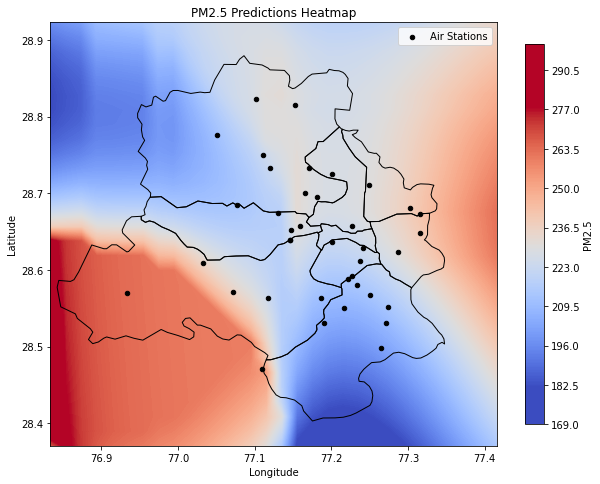

In [19]:
import heatmap
heatmap.plot_heatmap(lon = np.array(test['longitude']), lat = np.array(test['latitude']), values = test['PM2.5'].values)

# Predictions using model2 (distance threshold 30km)

In [20]:
import networkx as nx
import math

# Define the distance threshold for G1 (in kilometers)
distance_threshold_1 = 30

# Create an empty nx graph
Gh = nx.Graph()

# Iterate through each node in the dataset
for i in range(len(test)):
    lat1, lon1 = test.iloc[i]['latitude'], test.iloc[i]['longitude']
#     pm = test.iloc[i]['PM2.5']
    
    # Add the current node to the nx graph
    Gh.add_node(i, latitude=lat1, longitude=lon1)

    # Iterate through the remaining nodes
    for j in range(i + 1, len(test)):
        lat2, lon2 = test.iloc[j]['latitude'], test.iloc[j]['longitude']
        
        # Calculate the distance between the coordinates using the Haversine formula
        radius = 6371  # Earth's radius in kilometers
        dlat = math.radians(lat2 - lat1)
        dlon = math.radians(lon2 - lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance = radius * c
        
        # Check if the distance is below the threshold
        if distance <= distance_threshold_1:
            # Add an edge between the current pair of nodes in the nx graph
            Gh.add_edge(i, j)

# Now you have the nx graph where nodes represent the data points with latitude and longitude as features, and edges represent nodes within the distance threshold

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset

#Gh
node_features = [(Gh.nodes[node]['latitude'], Gh.nodes[node]['longitude']) for node in Gh.nodes]
edge_index = torch.tensor(list(Gh.edges)).t().contiguous()
# y = torch.tensor([G1.nodes[node]['pm'] for node in G1.nodes], dtype=torch.float).view(-1, 1)

data_h = Data(x=torch.tensor(node_features, dtype=torch.float), edge_index=edge_index)

In [22]:
out = model2(data_h.x.to(device), data_h.edge_index.to(device))
test['PM2.5'] = out.detach().numpy()

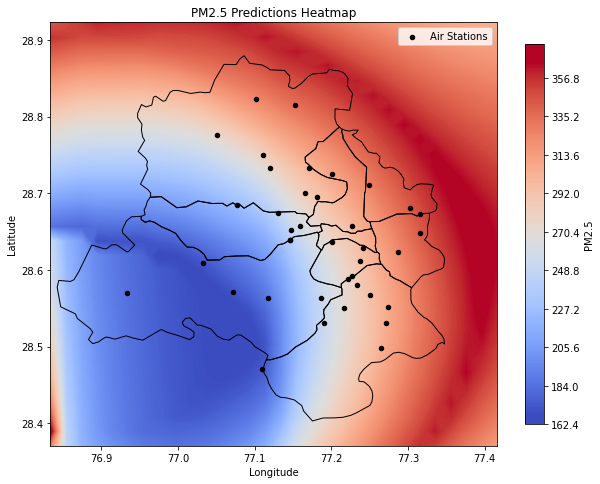

In [23]:
import heatmap
heatmap.plot_heatmap(lon = np.array(test['longitude']), lat = np.array(test['latitude']), values = test['PM2.5'].values)